<a href="https://colab.research.google.com/github/NguyenSLam/Artificial-Intelligence/blob/main/10VietnameseDishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU

In [3]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
folder = '/content/drive/MyDrive/AI_Picture/Dishes_Data/Train/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('bun_bo'):
    output= 1.0
  if file.startswith('banh_flan'):
    output= 2.0
  if file.startswith('banh_trung_thu'):
    output= 3.0
  if file.startswith('rau_muong_xao_toi'):
    output= 4.0
  if file.startswith('banh_bao'):
    output= 5.0
  if file.startswith('banh_theo_leo'):
    output= 6.0
  if file.startswith('xoi_xeo'):
    output= 7.0 
  if file.startswith('banh_mi'):
    output= 8.0
  if file.startswith('banh_cuon'):
    output= 9.0  
  if file.startswith('banh_xeo'):
    output= 10.0                 
  photo = load_img(folder + file, target_size= (150,150))
  photo= img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/AI/Backup_AI/10VietnameseDishes_photos', photos)
save('/content/drive/MyDrive/Colab Notebooks/AI/Backup_AI/10VietnameseDishes_labels', labels)

(819, 150, 150, 3) (819,)


In [4]:
split_index = int(0.1 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]
print(test_x.shape, train_x.shape)

(81, 150, 150, 3) (738, 150, 150, 3)


In [5]:
#về khoảng giá trị từ 0 đến 1 bằng cách chia tất cả các giá trị pixel cho 255
train_x = train_x.reshape((738, 150, 150, 3))
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((81, 150, 150, 3))
test_x = test_x.astype('float32')/255

In [6]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,11)
test_y = to_categorical(test_y,11)

In [7]:
# khai báo các thành phần cần thiết để xây dựng một mô hình mạng neural 
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 64
epochs = 40
classes = 11

In [8]:
# khởi tạo một mô hình mạng neural convolutional (CNN) 
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (150, 150, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [9]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                        

In [10]:
# biên dịch mô hình CNN 
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=0.001), metrics = ['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
# tạo một trình tăng cường ảnh để tăng cường dữ liệu huấn luyện 
datagen = ImageDataGenerator(rotation_range=90, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True)
datagen.fit(train_x)

In [12]:
history = model.fit(datagen.flow(train_x, train_y, batch_size=batch_size), epochs = epochs, validation_data = (test_x, test_y))

Epoch 1/40
12/12 [==============================] - 19s 692ms/step - loss: 3.0767 - accuracy: 0.1491 - val_loss: 2.5696 - val_accuracy: 0.0000e+00
Epoch 2/40
12/12 [==============================] - 4s 332ms/step - loss: 2.5267 - accuracy: 0.1734 - val_loss: 3.7949 - val_accuracy: 0.0000e+00
Epoch 3/40
12/12 [==============================] - 4s 315ms/step - loss: 2.5926 - accuracy: 0.1680 - val_loss: 2.5249 - val_accuracy: 0.0000e+00
Epoch 4/40
12/12 [==============================] - 5s 446ms/step - loss: 2.2374 - accuracy: 0.1924 - val_loss: 3.1297 - val_accuracy: 0.0000e+00
Epoch 5/40
12/12 [==============================] - 4s 329ms/step - loss: 2.2444 - accuracy: 0.1694 - val_loss: 3.1105 - val_accuracy: 0.0000e+00
Epoch 6/40
12/12 [==============================] - 5s 424ms/step - loss: 2.0161 - accuracy: 0.2371 - val_loss: 3.8520 - val_accuracy: 0.0000e+00
Epoch 7/40
12/12 [==============================] - 4s 315ms/step - loss: 1.8923 - accuracy: 0.3076 - val_loss: 2.8479 - va

In [13]:
#Đoạn code này đánh giá độ chính xác của mô hình
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Mất mát:',test_loss)
print('Độ chính xác',test_acc)

3/3 [==============================] - 0s 28ms/step - loss: 1.4981 - accuracy: 0.4198
Mất mát: 1.4980987310409546
Độ chính xác 0.4197530746459961


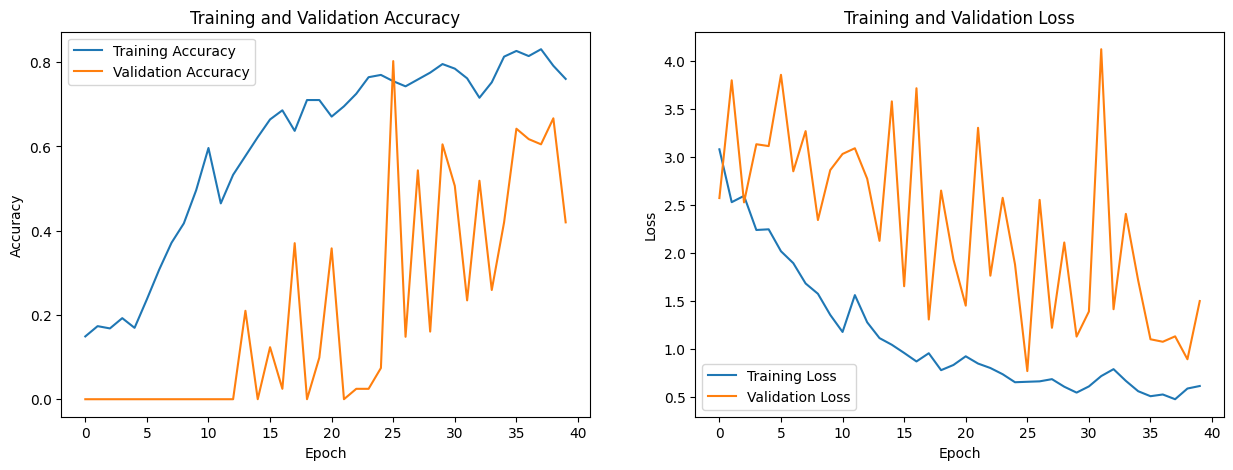

In [14]:
# vẽ đồ thị biểu diễn chính xác và độ lỗi cho quá trình huấn luyện và kiểm tra 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

1/1 [==============================] - 0s 445ms/step
bun_bo


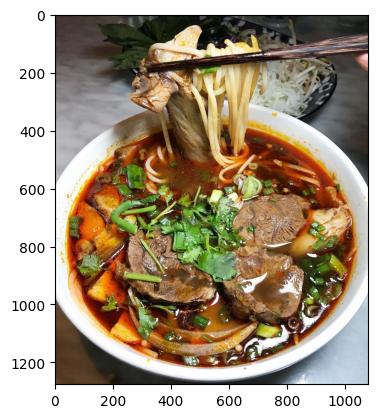

1/1 [==============================] - 0s 22ms/step
banh_xeo


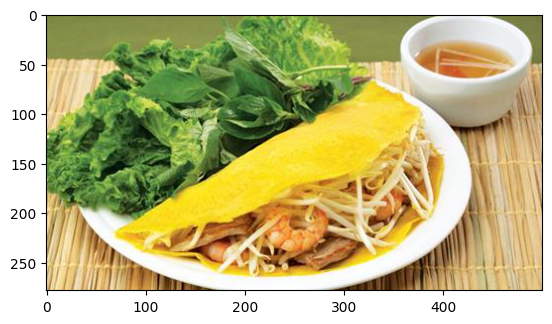

1/1 [==============================] - 0s 20ms/step
banh_mi


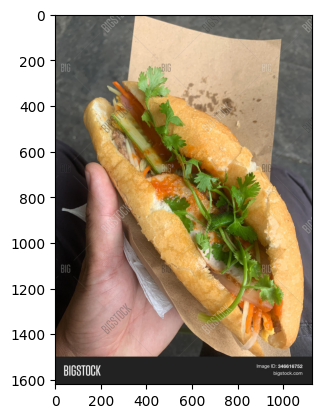

1/1 [==============================] - 0s 21ms/step
banh_cuon


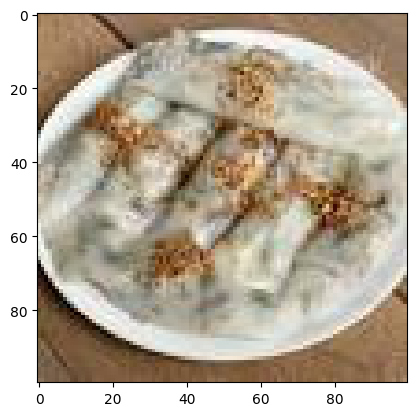

1/1 [==============================] - 0s 19ms/step
banh_trung_thu


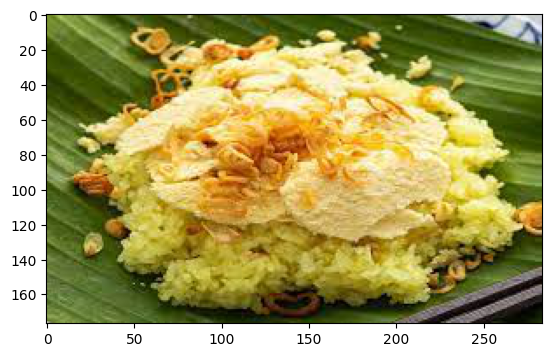

1/1 [==============================] - 0s 22ms/step
banh_cuon


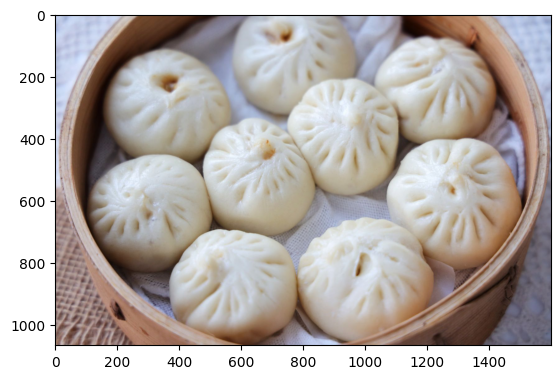

1/1 [==============================] - 0s 21ms/step
rau_muong_xao_toi


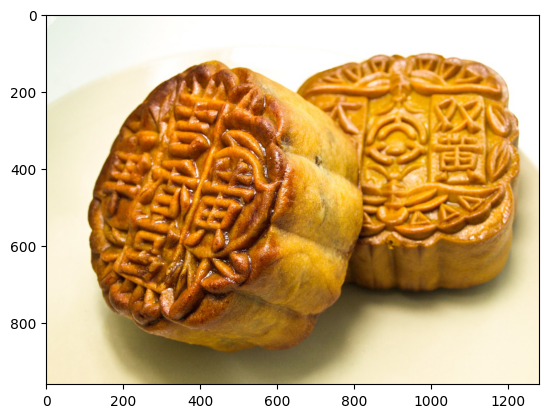

1/1 [==============================] - 0s 20ms/step
banh_bao


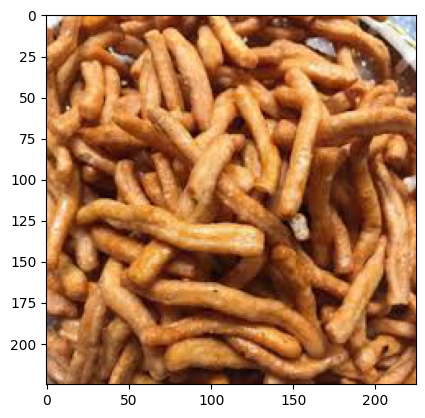

1/1 [==============================] - 0s 18ms/step
banh_theo_leo


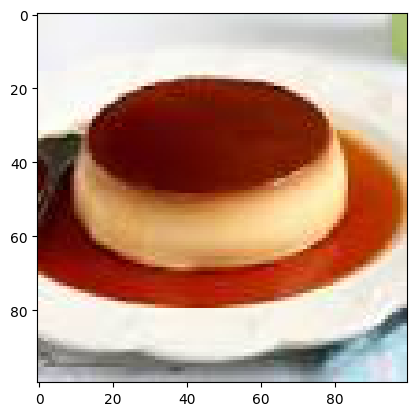

1/1 [==============================] - 0s 19ms/step
banh_flan


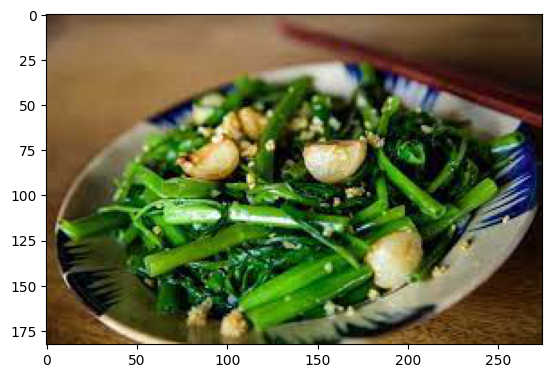

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/AI_Picture/Dishes_Data/Test/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (150, 150))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['','bun_bo','banh_theo_leo','rau_muong_xao_toi','banh_flan','banh_cuon','banh_bao','banh_trung_thu','banh_mi','xoi_xeo','banh_xeo']
  print(class_name[result])
  plt.show()